# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"
# AERIAL_IMG_PATH = "/content/aerial_image.jpg"
# SUNFLOWER_IMG_PATH = "/content/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

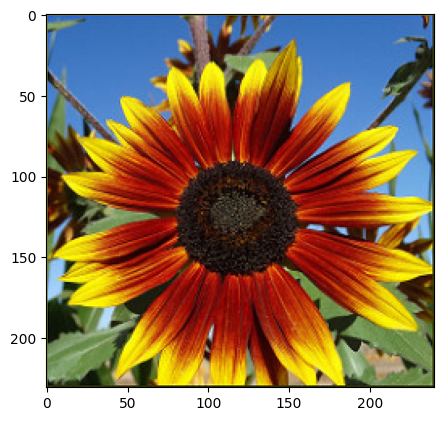

In [5]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

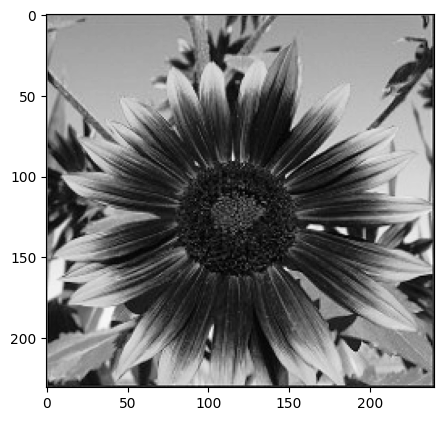

In [7]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

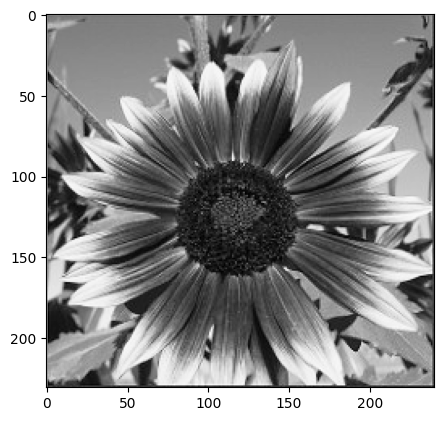

In [9]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [11]:
def convert_rgb_to_grayscale(img_rgb):
    # your code here
    return np.round(np.dot(img_rgb[..., :3], [0.299, 0.587, 0.114])).astype(np.uint8)

In [12]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

AssertionError: 

In [13]:
a = convert_rgb_to_grayscale(img_rgb)
b = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
cnt = 0
for i in range(a.shape[0]):
    for j in range(b.shape[1]):
        if a[i, j] != b[i, j]:
            cnt += 1
            print(f'{cnt}: {a[i, j]}, {b[i, j]}')

1: 129, 130
2: 226, 227
3: 226, 227
4: 226, 227
5: 214, 215
6: 91, 92
7: 98, 99
8: 201, 202
9: 104, 105
10: 53, 54
11: 211, 212
12: 201, 202


In [14]:
def convert_rgb_to_grayscale(img_rgb):
    # your code here
    return np.round(np.dot(img_rgb[..., :3], [0.29901, 0.58701, 0.11401])).astype(np.uint8)

In [15]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** обычное среднее присваивает одинаковый вес каналам, а человеческий глаз неодинаково восприимчив к различным цветам.

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [16]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

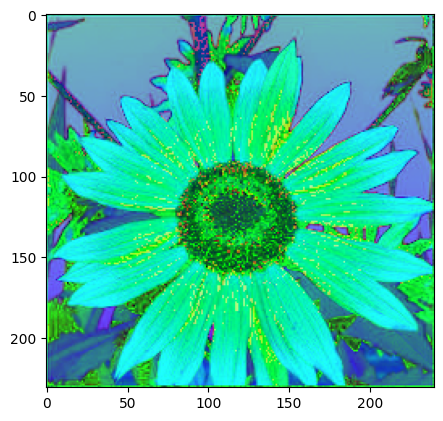

In [17]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

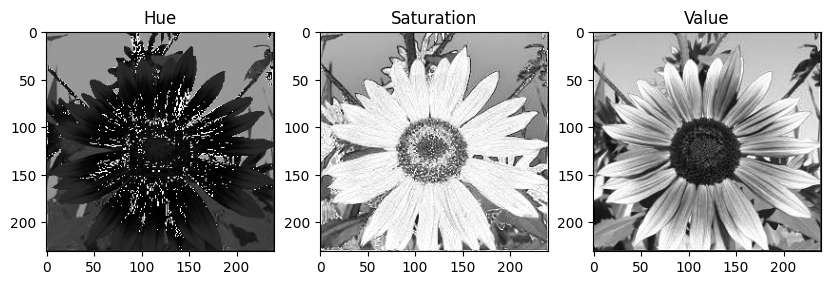

In [18]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

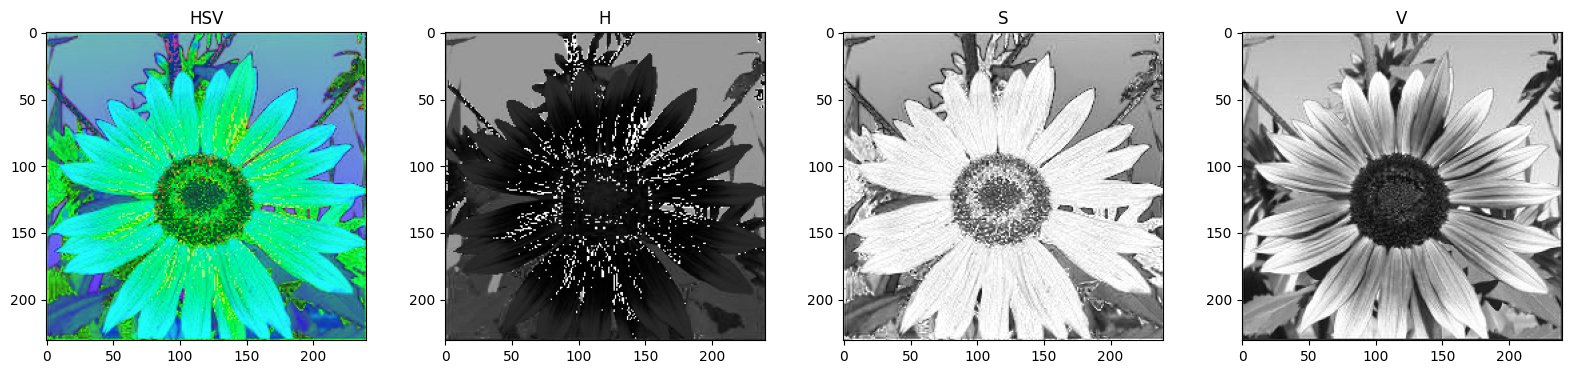

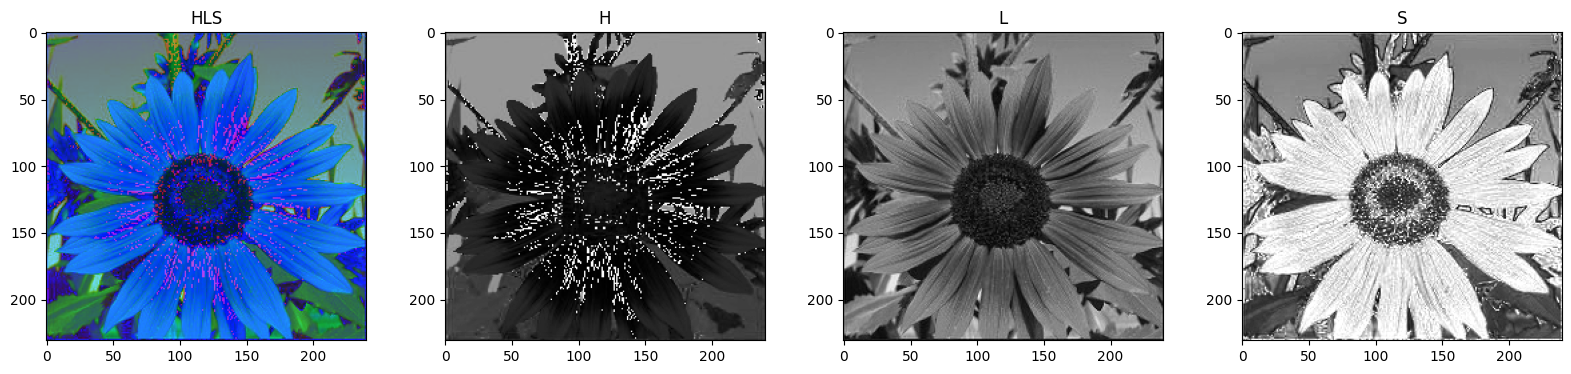

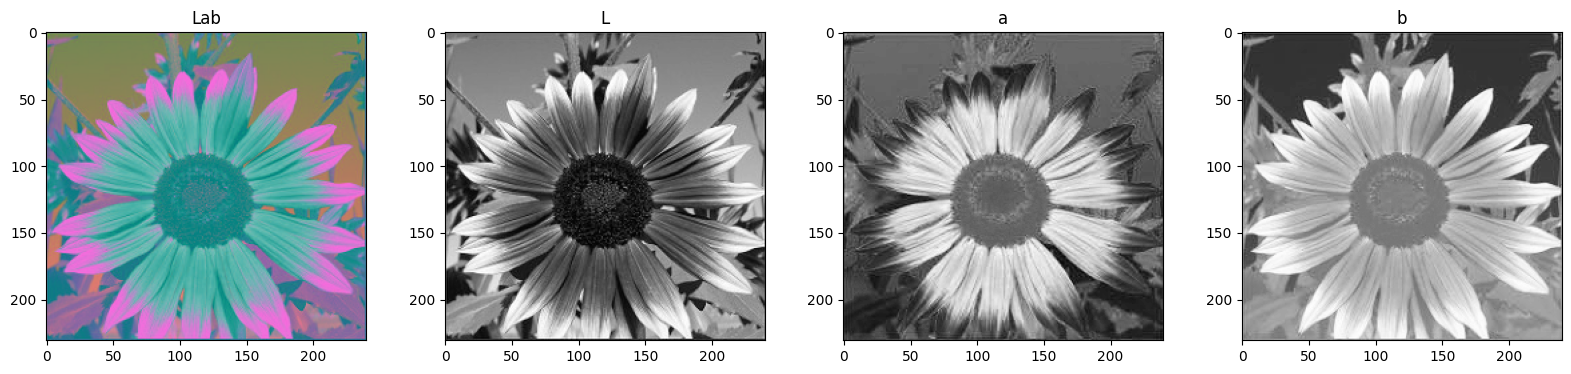

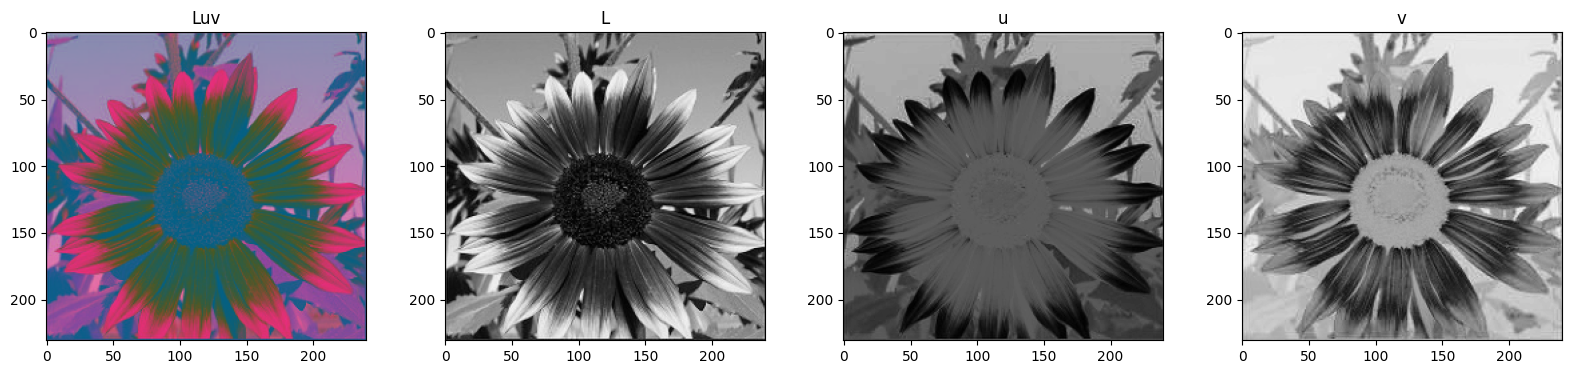

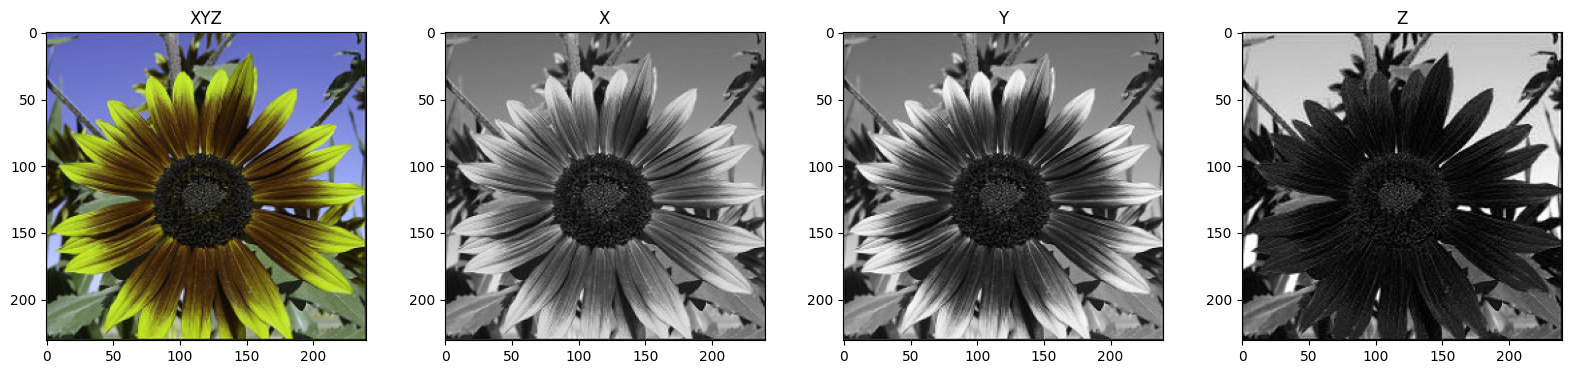

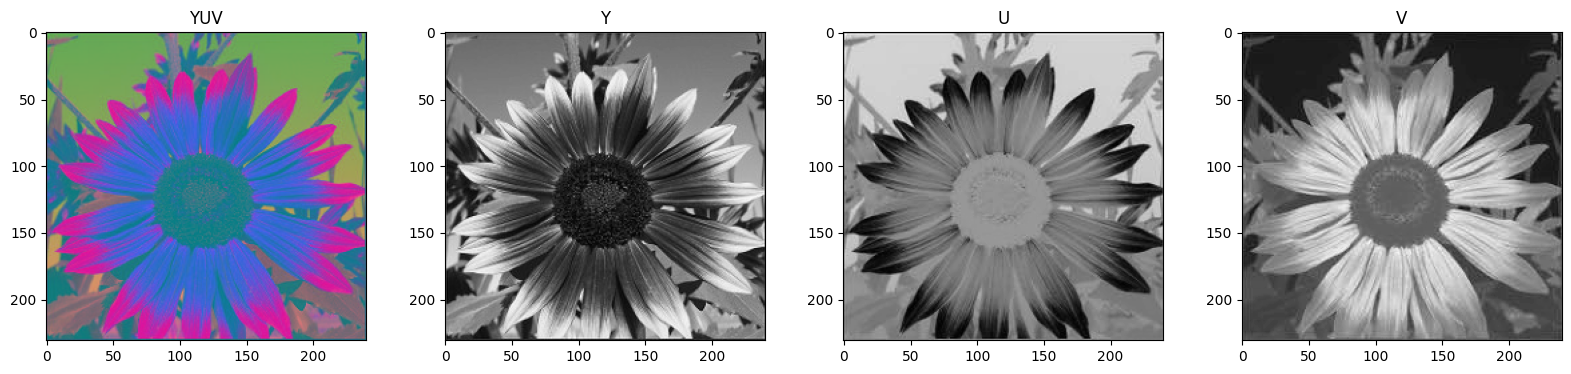

In [19]:
# your code here

for (conv, title) in [(41, 'HSV'), (53, 'HLS'), (45, 'Lab'), (50, 'Luv'),
 (33, 'XYZ'), (83, 'YUV')]:
    conv_img = cv2.cvtColor(img_rgb, conv)
    ch1, ch2, ch3 = cv2.split(conv_img)

    plt.figure(figsize=[30, 4])
    plt.subplot(161)
    plt.imshow(conv_img)
    plt.title(title)

    plt.subplot(162)
    plt.imshow(ch1, cmap="gray")
    plt.title(title[0])

    plt.subplot(163)
    plt.imshow(ch2, cmap="gray")
    plt.title(title[1])

    plt.subplot(164)
    plt.imshow(ch3, cmap="gray")
    plt.title(title[2])

    plt.show()

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** переход в другое цветовое пространство может быть полезен в тех случаях, когда нам, например, интересно "подсветить" определённые участки на изображении.

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [20]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [21]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [22]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

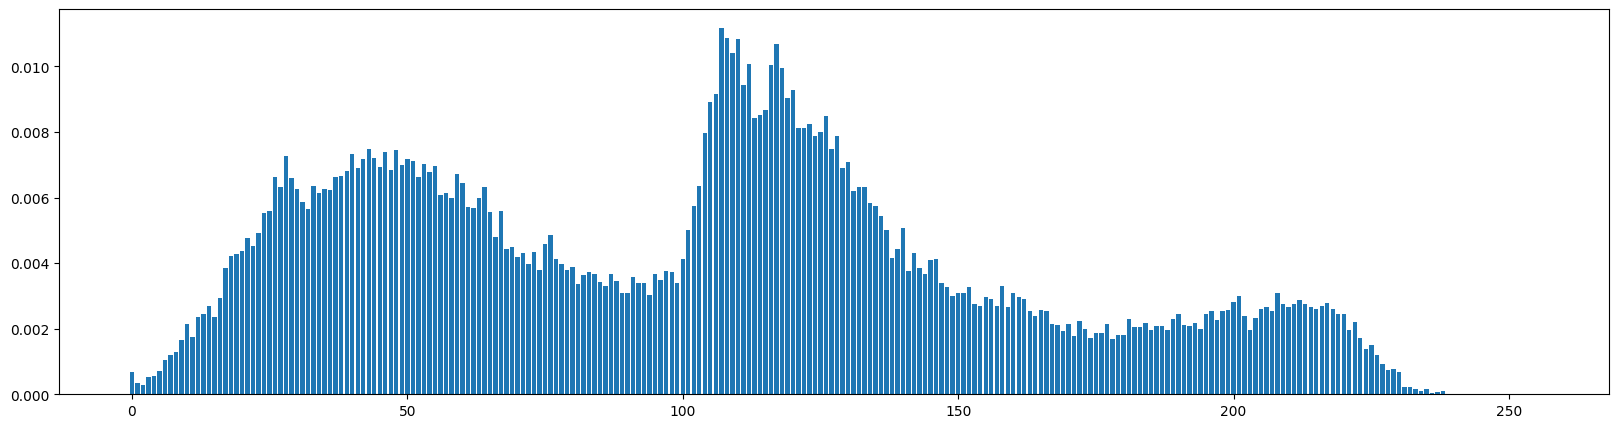

In [23]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [24]:
def compute_hist(img):
    # your code here

    hist = np.zeros(256)
    idxs, values = np.unique(img, return_counts=True)
    hist[idxs] = values

    return hist

In [25]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

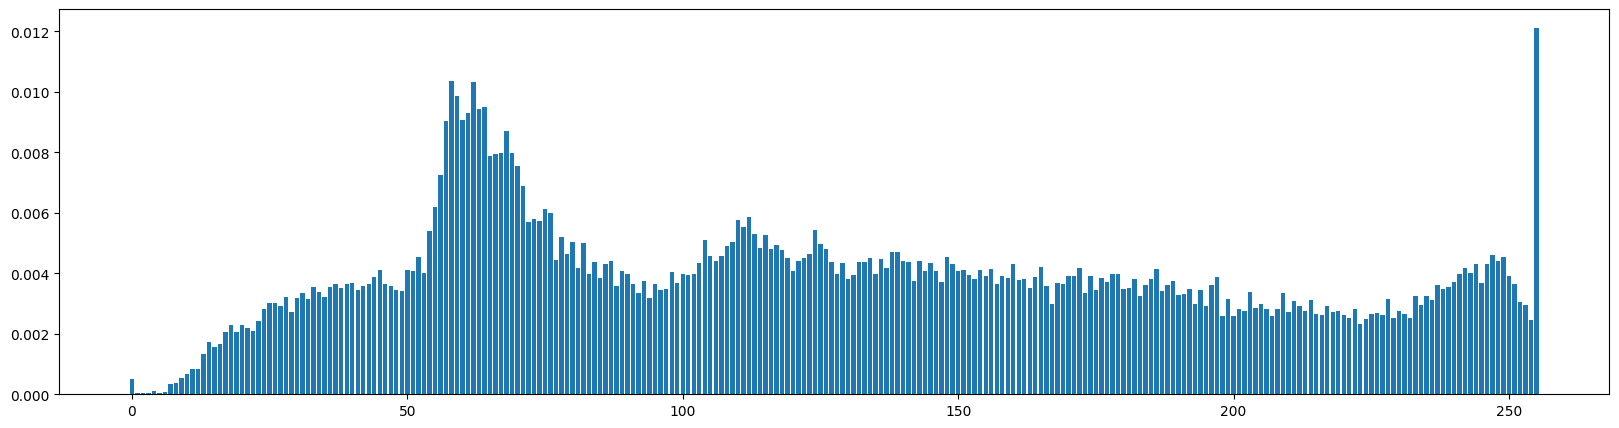

In [26]:
visualize_hist(hist_r)

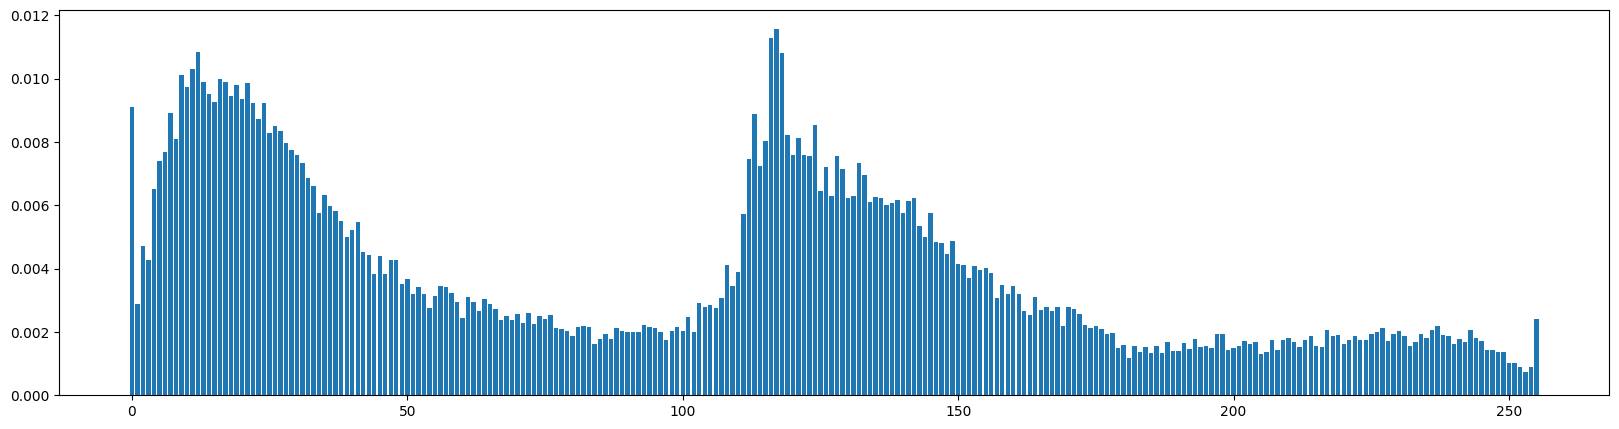

In [27]:
visualize_hist(hist_g)

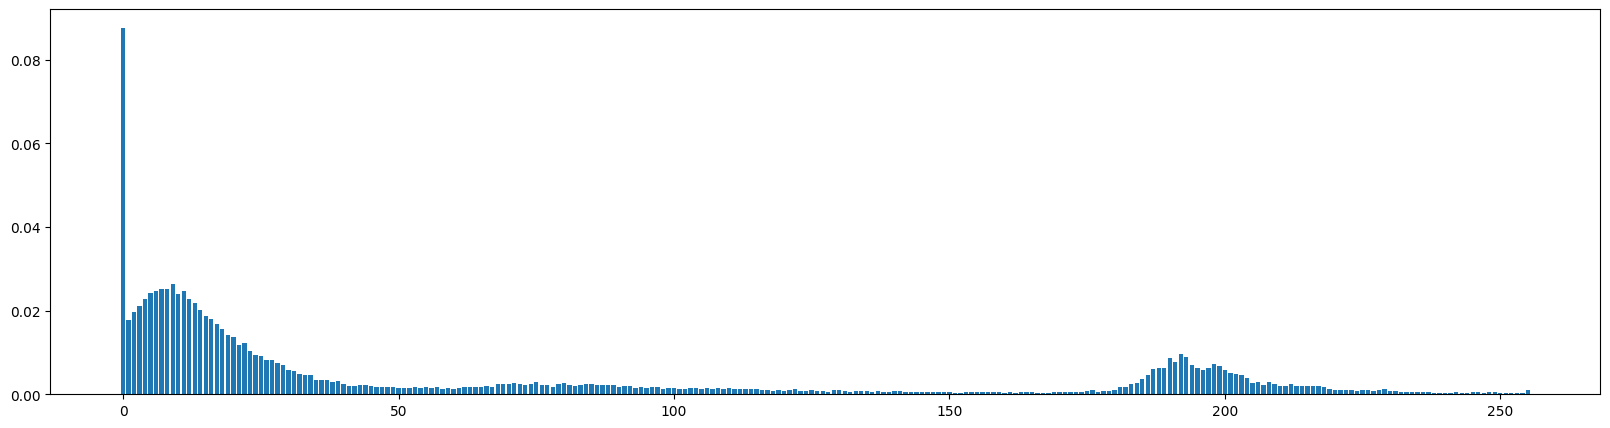

In [28]:
visualize_hist(hist_b)

In [29]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** По гистограмме изображения можно сказать о том, какое количество пикселей (относительно их общего количества) имеет определённую интенсивность. Т.е. по данной гистограмме можно судить о распределении пикселей изображения по интенсивностям в диапазоне от 0 до 255.

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** Здесь всё зависит от динамики происходящего на кадрах. Например, если камера статична и снимает некоторый пейзаж, то скорее всего гистограмма вряд ли будет претерпевать сильные изменения даже в течение 10 мин (есть некоторая зависимость от погоды, конечно), но если подождать, скажем, до вечера, то распределение "поедет" влево. Если же в кадре происходит какая-либо динамика, например объекты различного цвета и с различной интенсивностью цветов сменяют друг друга в кадре, то гистограмма так же будет изменять свой вид.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

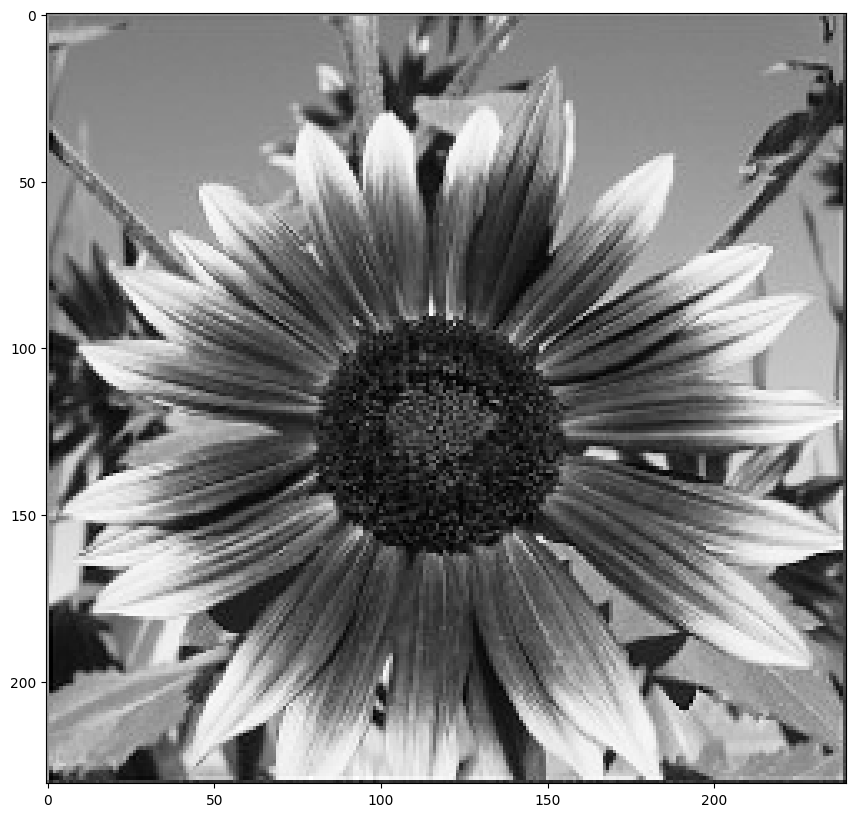

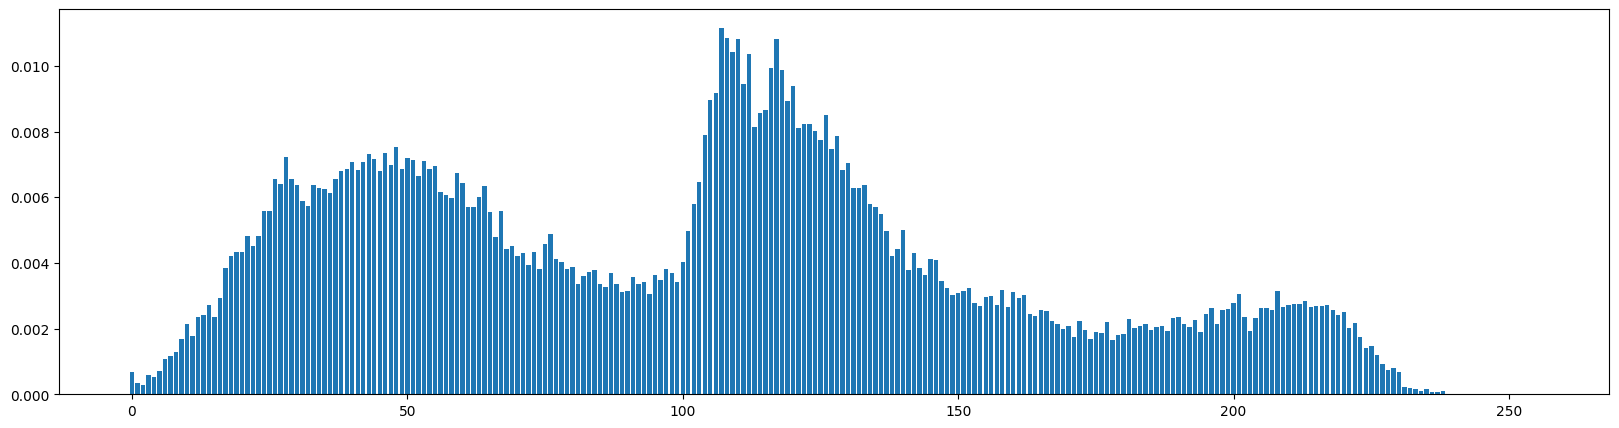

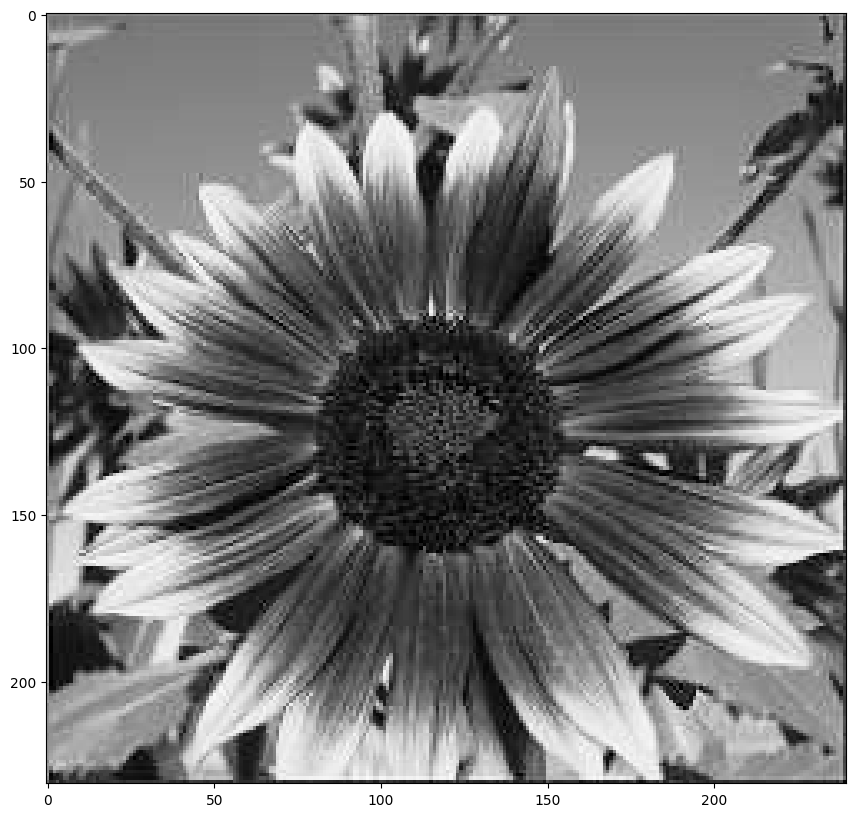

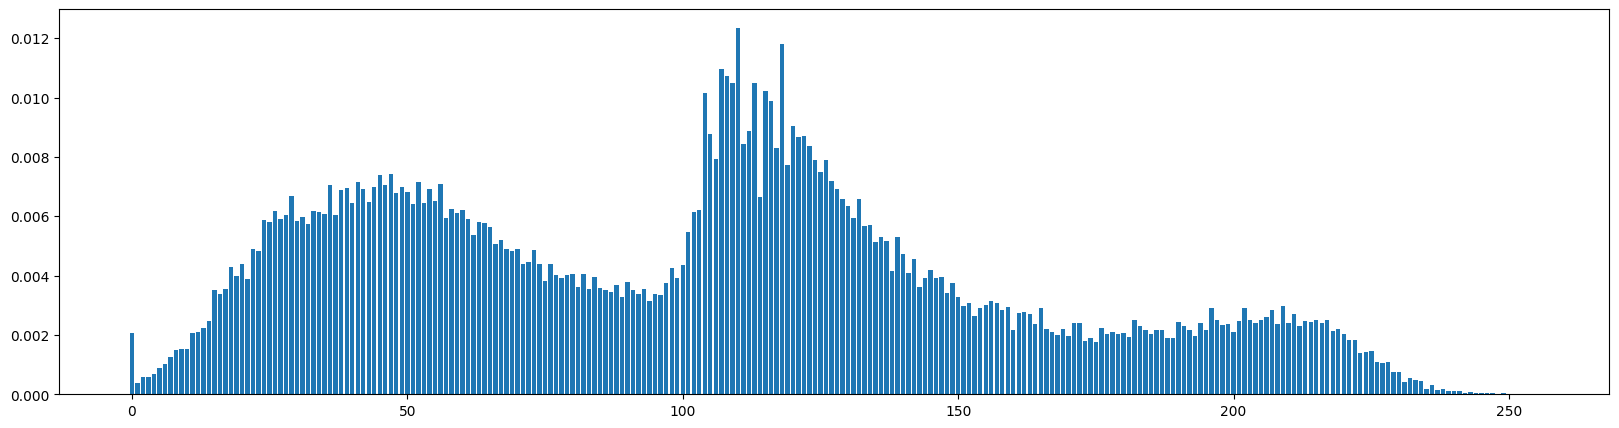

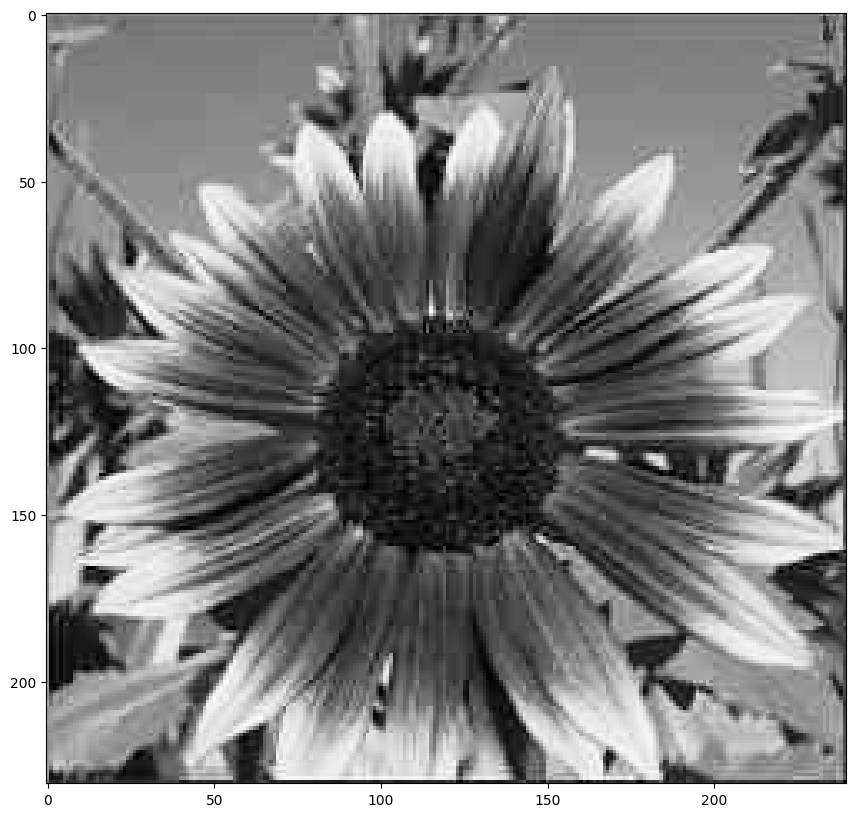

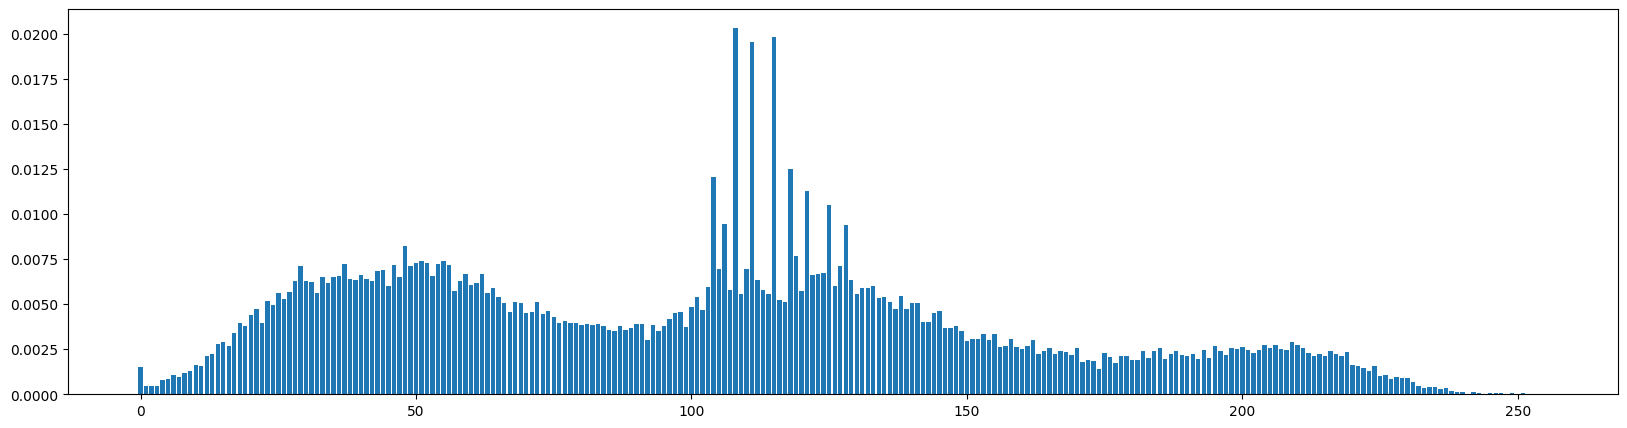

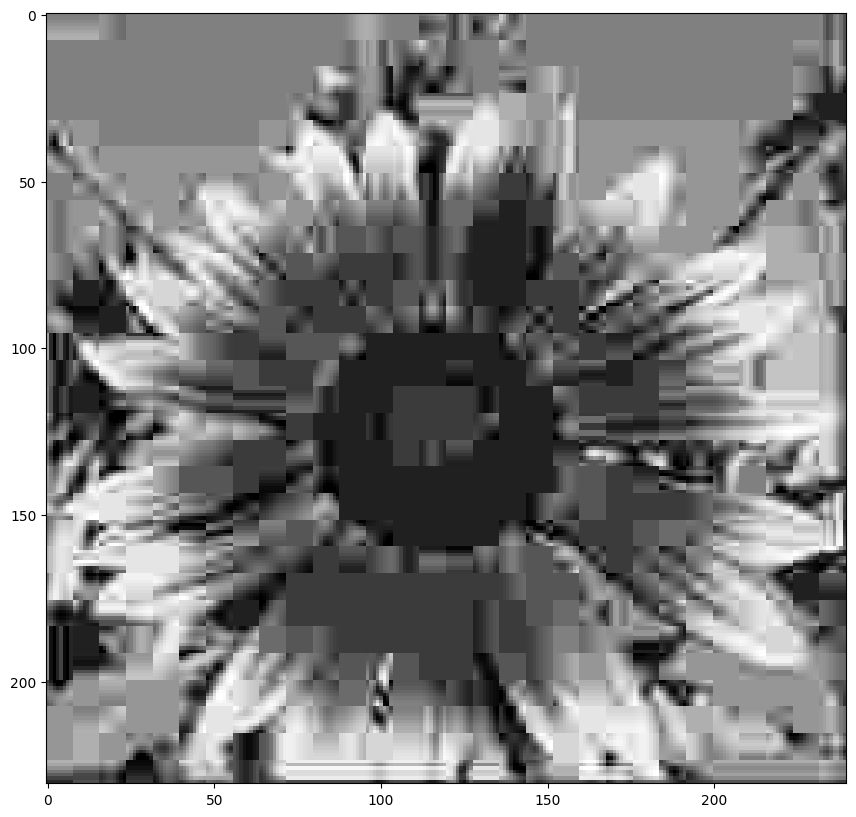

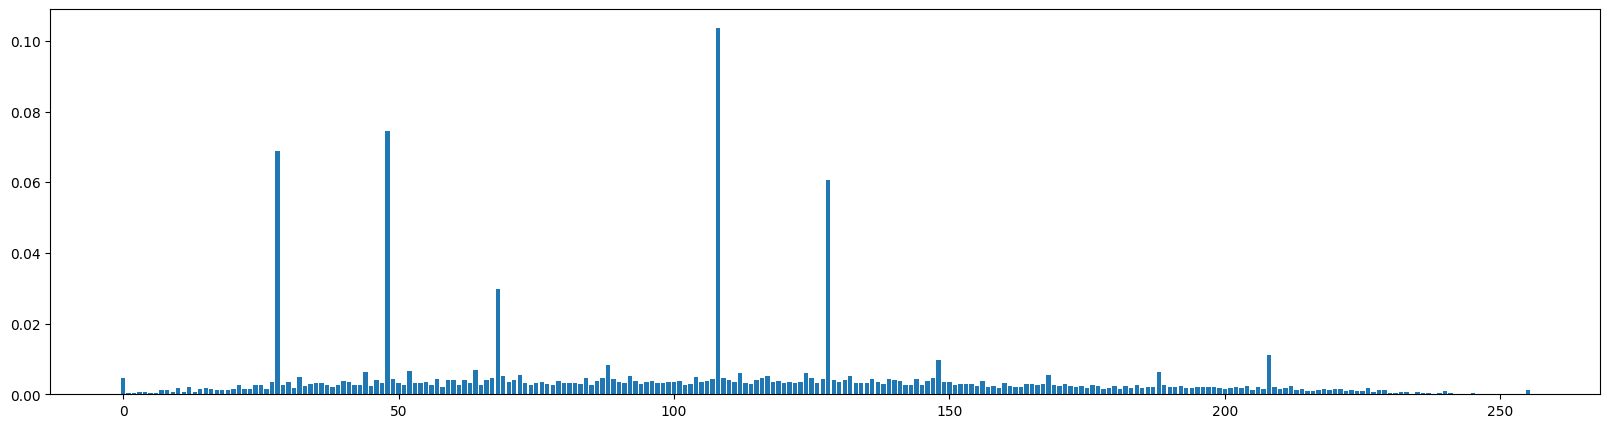

In [30]:
# your code here

for i in [90, 60, 30, 5]:
    cv2.imwrite(f'image_gray.png', img_gray)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), i]
    cv2.imwrite(f'lossy_compressed_image{i}.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, i])
    lossy_img = cv2.imread(f'lossy_compressed_image{i}.jpg', cv2.IMREAD_GRAYSCALE)
    hist_cv = compute_hist(lossy_img)
    plt.figure(figsize=[20, 10])
    plt.imshow(lossy_img, cmap='Greys_r')
    visualize_hist(hist_cv)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

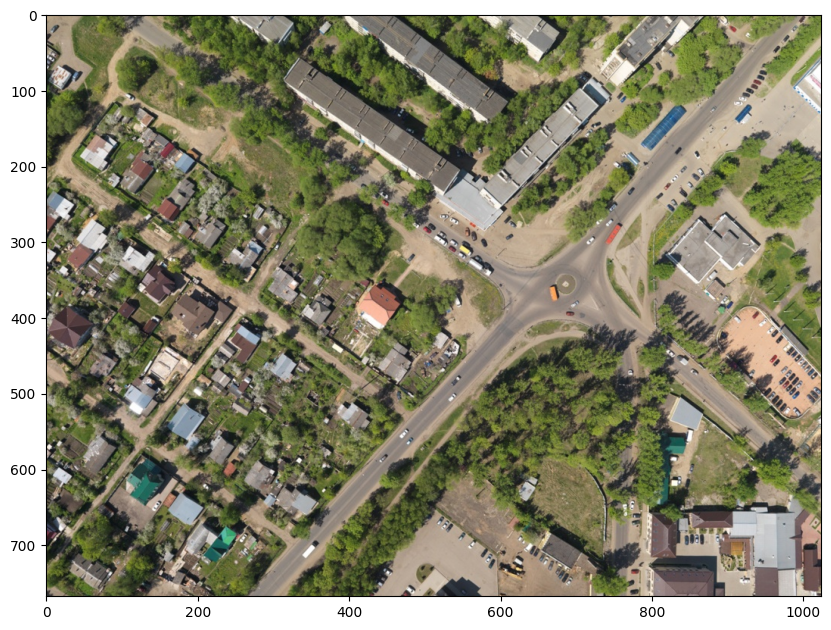

In [31]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)
aerial_image_hsv = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2HSV)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image)

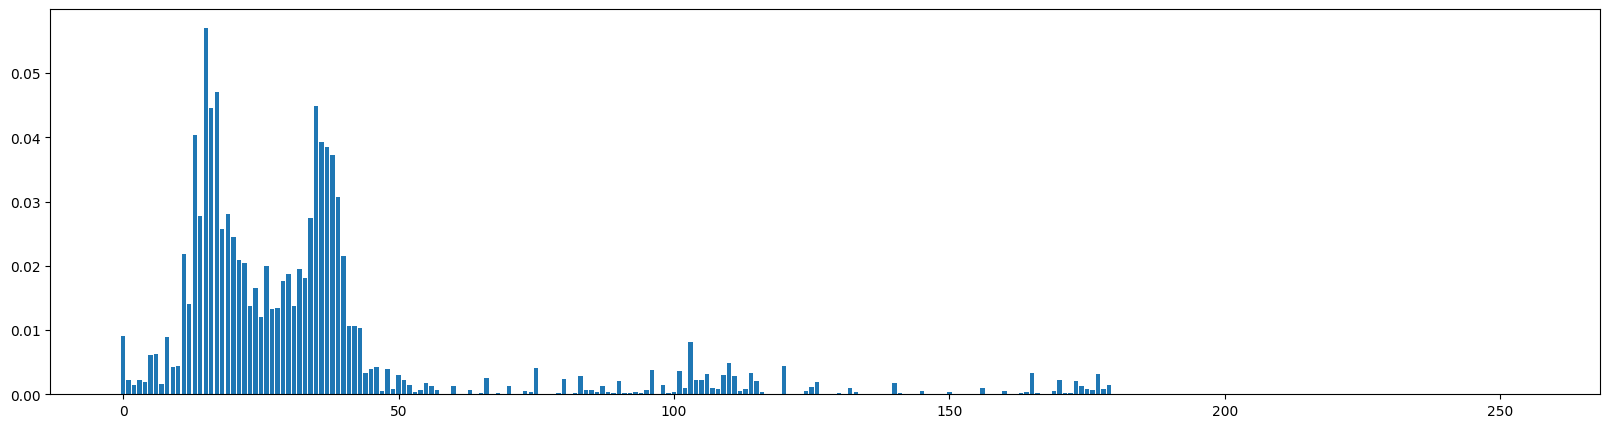

In [32]:
hist = compute_hist(aerial_image_hsv[:, :, 0])
visualize_hist(hist)

Доля зелёных насаждений на изображении: 33.93%


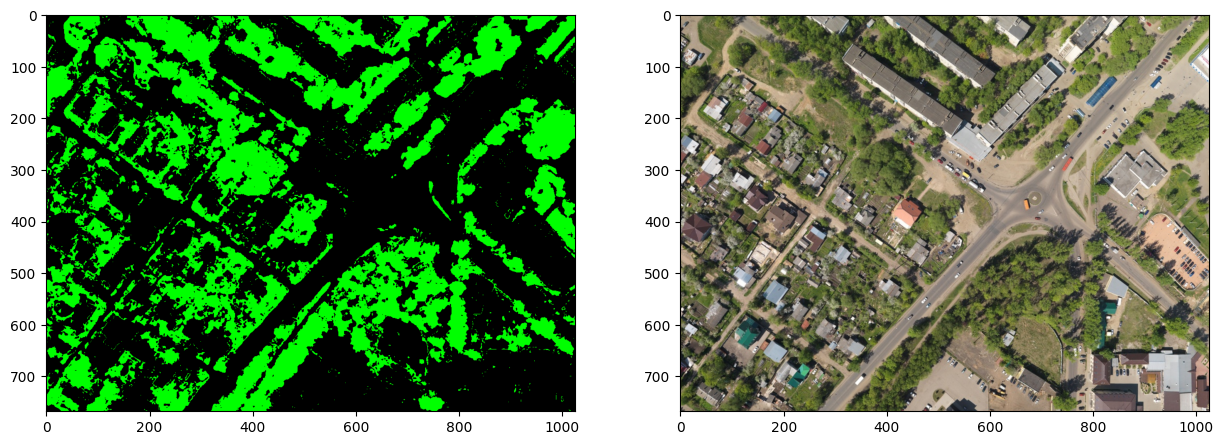

In [33]:
# your code here

lower = np.array([30, 0, 0])
upper = np.array([50, 0, 0])

hue = aerial_image_hsv[:, :, 0]
sat = aerial_image_hsv[:, :, 1]
val = aerial_image_hsv[:, :, 2]

green_mask = [(hue > lower[0]) & (hue < upper[0]), (sat > lower[1]) & (sat < upper[1]),\
              (val > lower[2]) & (val < [upper[2]])]
green_mask = np.stack([green_mask[0], green_mask[1], green_mask[2]], axis=2)
mask = np.where(green_mask, aerial_image, 255)
green_mask = np.zeros_like(mask)
for i in range(green_mask.shape[0]):
    for j in range(green_mask.shape[1]):
        if mask[i, j, 0] != 255:
            green_mask[i, j, 1] = 255

plt.figure(figsize=[15, 15])
plt.subplot(121)
plt.imshow(green_mask)

plt.subplot(122)
plt.imshow(aerial_image)
print(f'Доля зелёных насаждений на изображении: {np.round(mask[(mask<255)].shape[0]/(mask.shape[0]*mask.shape[1])*100, 2)}%')

**Погрешность на самом деле невелика, на глаз ошибка около 5-10%. Действительно, участки, характеризующиеся одним цветом и достаточно узким цветовым диапазоном, возможно сегментировать дёшево если нас не интересуют высокие показатели метрик. Однако стоит учитывать, что если в кадре присутствуют объекты, которые не являются целевыми, но имеют схожий цвет, то в этом случае данный подход будет не очень эффективен, поскольку будем сегментировать лишние объекты. На самом деле и на данном фото такое прослеживается, пусть и в мелочах. Но если мы решили таки воспользоваться данным алгоритмом, то нужно понимать, насколько нам важна точность сегментации или же мы можем позволить себе сегментировать лишние объекты**

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [34]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img

        # your code here

        self.I = np.cumsum(np.cumsum(img, axis=0), axis=1)

    def sum(self, x, y, w, h):
        # your code here

        if x != 0 and y != 0:
            s = (self.I[y+h-1, x+w-1] + self.I[y-1, x-1]) - \
        (self.I[y+h-1, x-1] + self.I[y-1, x+w-1])
        elif x == 0 and y == 0:
            s = self.I[y+h-1, x+w-1]
        elif x == 0 and y != 0:
            s = self.I[y+h-1, x+w-1] - self.I[y-1, x+w-1]
        elif x != 0 and y == 0:
            s = self.I[y+h-1, x+w-1] - self.I[y+h-1, x-1]

        return s

In [35]:
I = IntegralImage(img_gray)

In [36]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 10, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 10, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 0, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 10, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 0, 10, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 140, 131, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 140, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 0, 131, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** Расчёт суммы значений любых единиц измерения (в т.ч. условных) внутри ограничивающего прямоугольника на плоскости, вычисление центра масс объектов.

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** Динамическое программирование.